In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_sentiment = pd.read_csv('/content/fear_greed_index.csv')
df_trades = pd.read_csv('/content/historical_data.csv')
df_trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
df_trades['Timestamp IST'] = pd.to_datetime(df_trades['Timestamp IST'], dayfirst=True)
df_trades['trade_date'] = df_trades['Timestamp IST'].dt.normalize()

df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])
df_sentiment['trade_date'] = df_sentiment['date'].dt.normalize()

df_merged = pd.merge(
    df_trades,
    df_sentiment[['trade_date','value','classification']],
    on='trade_date',
    how='left'
)

print(df_merged[['Timestamp IST', 'classification', 'Closed PnL']].head())

        Timestamp IST classification  Closed PnL
0 2024-12-02 22:50:00  Extreme Greed         0.0
1 2024-12-02 22:50:00  Extreme Greed         0.0
2 2024-12-02 22:50:00  Extreme Greed         0.0
3 2024-12-02 22:50:00  Extreme Greed         0.0
4 2024-12-02 22:50:00  Extreme Greed         0.0


In [ ]:
df_merged.isna().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [ ]:
df_merged = df_merged.dropna()
df_merged.isna().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [36]:
df_merged.to_csv("final_merged_data.csv", index=False)

Profitability Stats by Sentiment
  classification       mean           sum  count
0   Extreme Fear  34.537862  7.391102e+05  21400
1  Extreme Greed  67.892861  2.715171e+06  39992
2           Fear  54.290400  3.357155e+06  61837
3          Greed  42.743559  2.150129e+06  50303
4        Neutral  34.307718  1.292921e+06  37686


/tmp/ipython-input-1683227820.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


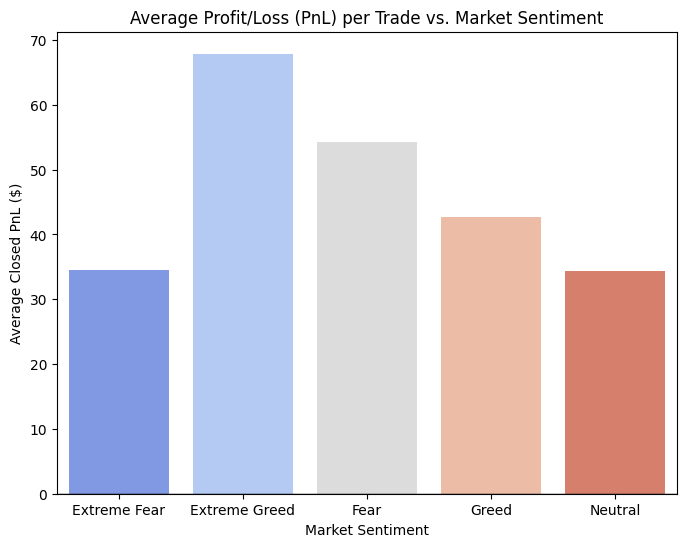

In [37]:
profit_analysis = df_merged.groupby('classification')['Closed PnL'].agg(['mean', 'sum', 'count']).reset_index()

print("Profitability Stats by Sentiment")
print(profit_analysis)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=profit_analysis,
    x='classification',
    y='mean',
    palette='coolwarm'
)
plt.title('Average Profit/Loss (PnL) per Trade vs. Market Sentiment')
plt.ylabel('Average Closed PnL ($)')
plt.xlabel('Market Sentiment')
plt.axhline(0, color='black', linewidth=1)
plt.savefig('outputs/profit_analysis.png')
plt.show()

Average Trade Size by Sentiment:
  classification     Size USD
0   Extreme Fear  5349.731843
1  Extreme Greed  3112.251565
2           Fear  7816.109931
3          Greed  5736.884375
4        Neutral  4782.732661


/tmp/ipython-input-1414064622.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=risk_analysis, x='classification', y='Size USD', palette='viridis')


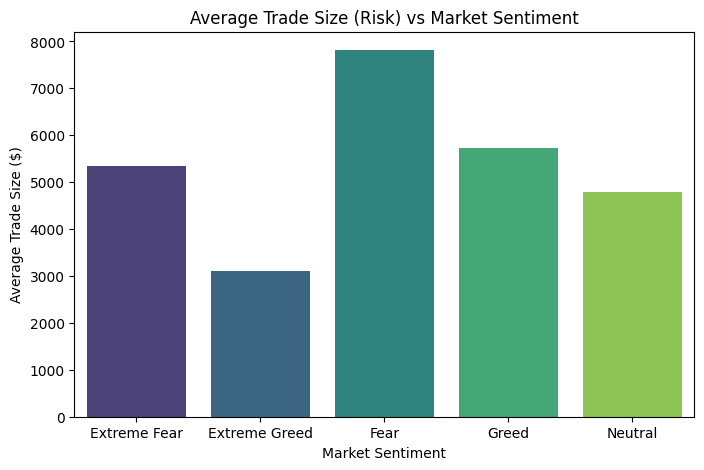

In [ ]:
risk_analysis = df_merged.groupby('classification')['Size USD'].mean().reset_index()
print("Average Trade Size by Sentiment:")
print(risk_analysis)

# 2. Visualize it
plt.figure(figsize=(8, 5))
sns.barplot(data=risk_analysis, x='classification', y='Size USD', palette='viridis')

plt.title('Average Trade Size (Risk) vs Market Sentiment')
plt.ylabel('Average Trade Size ($)')
plt.xlabel('Market Sentiment')
plt.savefig('outputs/risk_analysis.png')
plt.show()

Win Rate (%)
  classification        Win
0   Extreme Fear  37.060748
1  Extreme Greed  46.494299
2           Fear  42.076750
3          Greed  38.482794
4        Neutral  39.699093


/tmp/ipython-input-4026813105.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=win_rate_df, x='classification', y='Win', palette='magma')


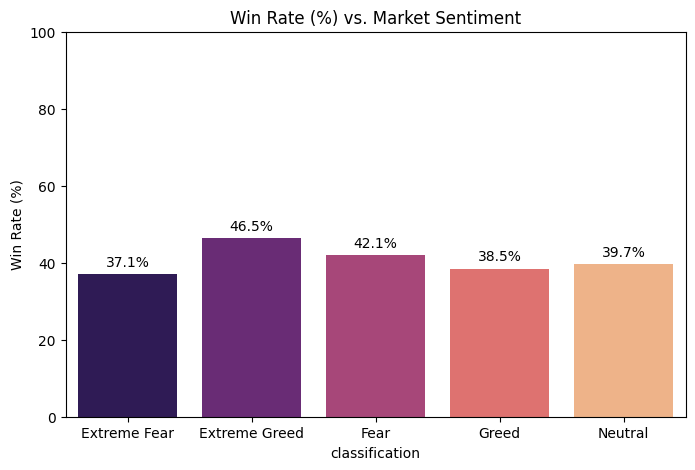

In [ ]:
df_merged['Win'] = df_merged['Closed PnL'] > 0

win_rate = df_merged.groupby('classification')['Win'].mean() * 100
win_rate_df = win_rate.reset_index()

print("Win Rate (%)")
print(win_rate_df)

plt.figure(figsize=(8, 5))
sns.barplot(data=win_rate_df, x='classification', y='Win', palette='magma')

plt.title('Win Rate (%) vs. Market Sentiment')
plt.ylabel('Win Rate (%)')
plt.ylim(0, 100)
for index, row in win_rate_df.iterrows():
    plt.text(index, row.Win + 2, f"{row.Win:.1f}%", color='black', ha="center")
plt.savefig('outputs/win_rate.png')
plt.show()

  classification  Side  Closed PnL
0   Extreme Fear   BUY   34.114627
1   Extreme Fear  SELL   34.980106
2  Extreme Greed   BUY   10.498927
3  Extreme Greed  SELL  114.584643
4           Fear   BUY   63.927104
5           Fear  SELL   45.049641
6          Greed   BUY   25.002302
7          Greed  SELL   59.691091
8        Neutral   BUY   29.227429
9        Neutral  SELL   39.456408


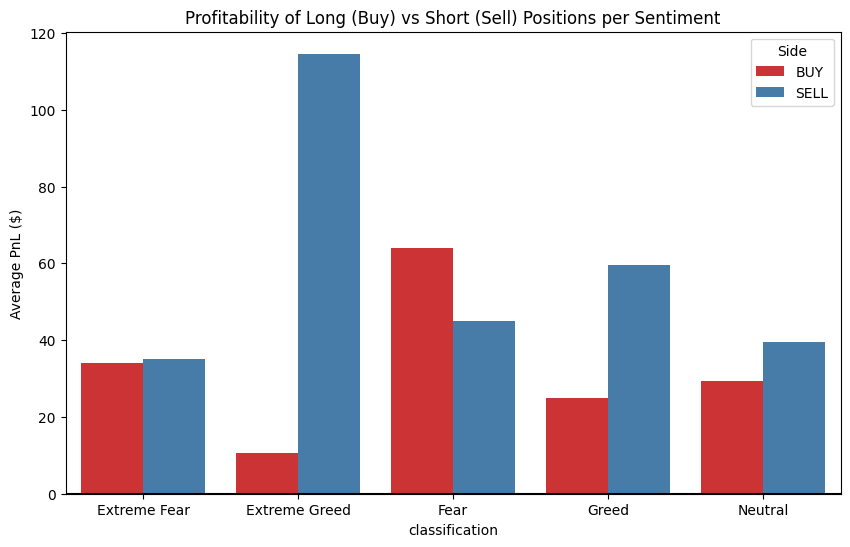

In [ ]:
strategy_analysis = df_merged.groupby(['classification', 'Side'])['Closed PnL'].mean().reset_index()
print(strategy_analysis)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=strategy_analysis,
    x='classification',
    y='Closed PnL',
    hue='Side',
    palette='Set1'
)
plt.title('Profitability of Long (Buy) vs Short (Sell) Positions per Sentiment')
plt.ylabel('Average PnL ($)')
plt.axhline(0, color='black')
plt.savefig('outputs/strategy_analysis.png')
plt.show()

  Prev_Was_Loss     Size USD
0     After Win  5683.736219
1    After Loss  5147.265517


/tmp/ipython-input-87787066.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=behavior_check, x='Prev_Was_Loss', y='Size USD', palette='Reds')


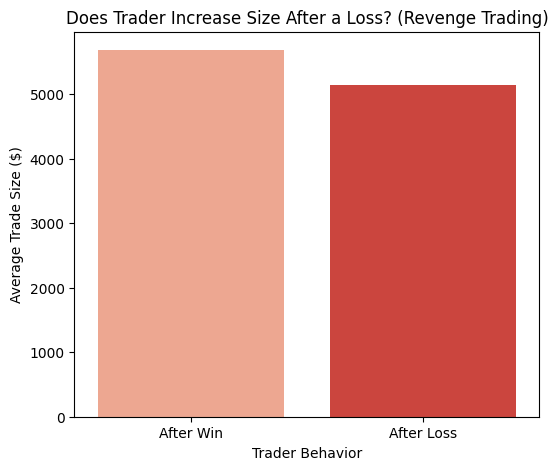

In [ ]:
df_merged['Prev_PnL'] = df_merged['Closed PnL'].shift(1)

df_merged['Prev_Was_Loss'] = df_merged['Prev_PnL'] < 0

behavior_check = df_merged.groupby('Prev_Was_Loss')['Size USD'].mean().reset_index()
behavior_check['Prev_Was_Loss'] = behavior_check['Prev_Was_Loss'].map({True: 'After Loss', False: 'After Win'})
print(behavior_check)

plt.figure(figsize=(6, 5))
sns.barplot(data=behavior_check, x='Prev_Was_Loss', y='Size USD', palette='Reds')
plt.title('Does Trader Increase Size After a Loss? (Revenge Trading)')
plt.ylabel('Average Trade Size ($)')
plt.xlabel('Trader Behavior')
plt.savefig('outputs/behavior_check.png')
plt.show()